In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [35]:
df=pd.read_csv('/kaggle/input/new-data/dataset_11_Hotel Bookings.csv')
df.head()

,Date,Product,Region,Customer_Type,Quantity,Price,Discount,Revenue
0,2024-11-07,Single Room,South,Leisure,5,114.12,0.14,490.72
1,2024-06-01,Single Room,North,Leisure,6,200.86,0.04,1156.95
2,2024-02-23,Double Room,West,Business,6,203.27,0.03,1183.03
3,2024-11-07,Suite,South,Leisure,3,105.07,0.16,264.78
4,2024-09-04,Double Room,West,Business,3,337.49,0.21,799.85


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [21]:
df.describe()

,Quantity,Price,Discount,Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.923000,274.328960,0.149980,912.583220
std,2.001269,132.343746,0.084883,680.423289
min,1.000000,50.940000,0.000000,42.730000
25%,2.000000,160.775000,0.077500,355.567500
50%,4.000000,268.780000,0.150000,740.115000
75%,6.000000,391.935000,0.220000,1310.732500
max,7.000000,499.860000,0.300000,3165.370000


In [36]:
df.isnull().sum()

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64

In [25]:

df.columns

Index(['Date', 'Product', 'Region', 'Customer_Type', 'Quantity', 'Price',
       'Discount', 'Revenue'],
      dtype='object')

In [26]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
print("After Cleaning:")
print(df.info())

After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB
None


In [38]:
most_ordered_items = df['Product'].value_counts()
print("Most Ordered Items:\n", most_ordered_items.head())

revenue_by_product = df.groupby('Product')['Revenue'].sum()
print("Revenue by Product:\n", revenue_by_product)

df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
orders_over_time = df.groupby(df['Date'].dt.date).size()
print("Orders Over Time:\n", orders_over_time)

Most Ordered Items:
 Product
Double Room    341
Suite          341
Single Room    318
Name: count, dtype: int64
Revenue by Product:
 Product
Double Room    306253.65
Single Room    295909.14
Suite          310420.43
Name: Revenue, dtype: float64
Orders Over Time:
 Date
2024-01-01    5
2024-01-02    3
2024-01-03    2
2024-01-04    3
2024-01-05    3
             ..
2024-12-26    4
2024-12-27    2
2024-12-28    4
2024-12-29    1
2024-12-30    4
Length: 346, dtype: int64


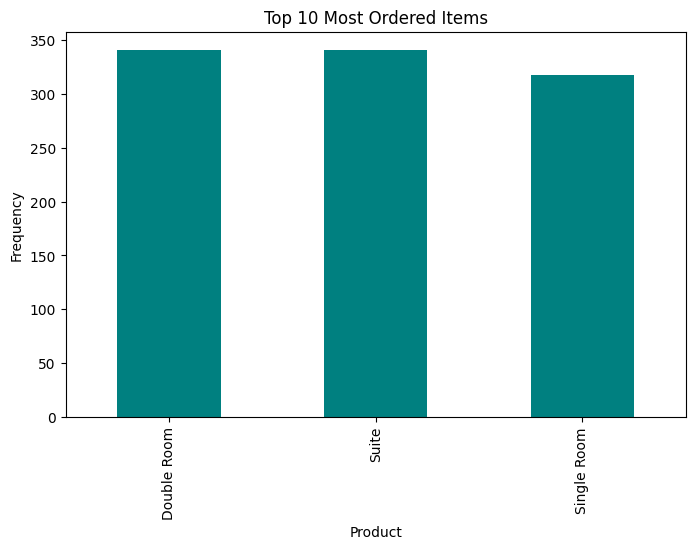

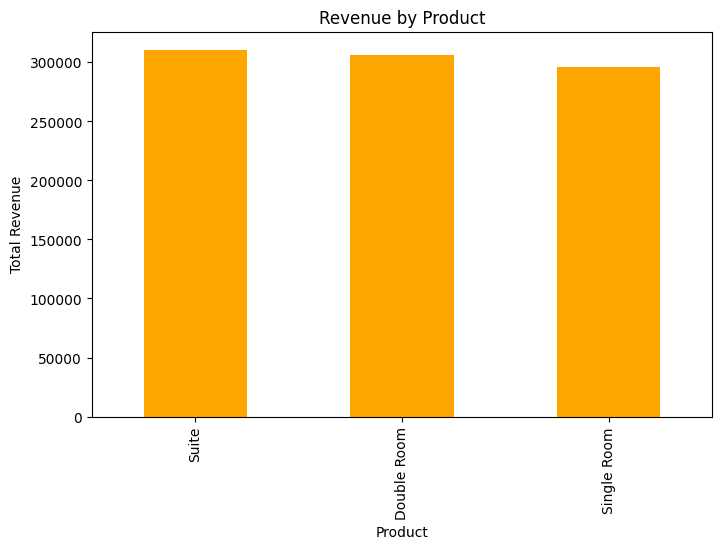

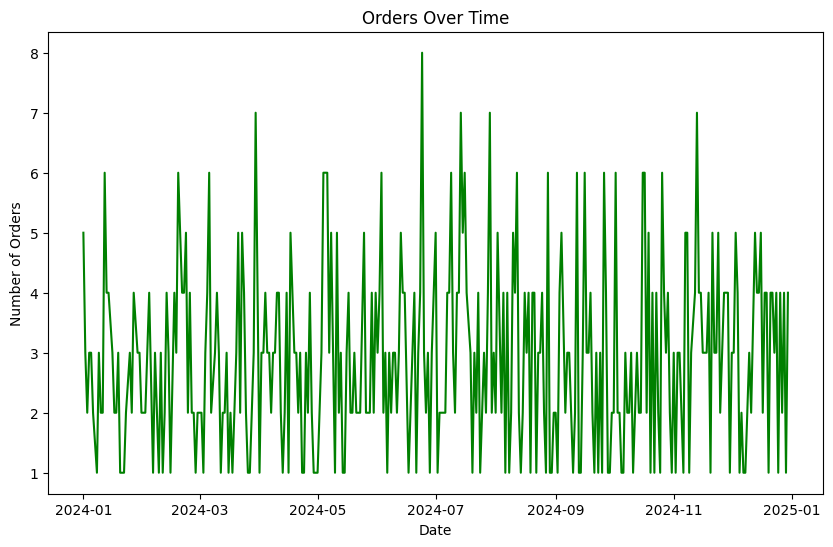

In [40]:
most_ordered_items.head(10).plot(kind='bar', figsize=(8, 5), color='teal')
plt.title("Top 10 Most Ordered Items")
plt.xlabel("Product")
plt.ylabel("Frequency")
plt.show()


revenue_by_product = df.groupby('Product')['Revenue'].sum()
revenue_by_product.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()


orders_over_time.plot(figsize=(10, 6), color='green')
plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()

In [41]:
print("Conclusions:")
print("- Most ordered products are likely the most popular or in demand.")
print("- Products generating the highest revenue could indicate profitable areas.")
print("- Trends in orders over time could help with demand forecasting and planning.")

Conclusions:
- Most ordered products are likely the most popular or in demand.
- Products generating the highest revenue could indicate profitable areas.
- Trends in orders over time could help with demand forecasting and planning.
